# Best Practices with Pandas

Following along with [this presentation](https://www.youtube.com/watch?v=dPwLlJkSHLo&feature=youtu.be) from PyCon 2019.

# Introduction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
%matplotlib inline

In [4]:
ted = pd.read_csv('data/1. raw/ted.csv')
ted.sample(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
2297,13,Being alone takes its toll. Feel like it's tim...,269,TED Studio,1462147200,33,Rainn Wilson,Rainn Wilson: Ideas worth dating,1,1475837387,"[{'id': 7, 'name': 'Funny', 'count': 374}, {'i...","[{'id': 1685, 'hero': 'https://pe.tedcdn.com/i...","Actor, writer","['adventure', 'curiosity', 'entertainment', 'e...",Ideas worth dating,https://www.ted.com/talks/rainn_wilson_ideas_w...,792297
40,58,"Accepting his 2005 TED Prize, photographer Edw...",2065,TED2005,1108598400,22,Edward Burtynsky,Edward Burtynsky: My wish: Manufactured landsc...,1,1162253460,"[{'id': 1, 'name': 'Beautiful', 'count': 106},...","[{'id': 279, 'hero': 'https://pe.tedcdn.com/im...",Photographer,"['TED Prize', 'art', 'cities', 'culture', 'des...",My wish: Manufactured landscapes and green edu...,https://www.ted.com/talks/edward_burtynsky_on_...,975107


In [5]:
ted.shape

(2550, 17)

In [6]:
ted.dtypes

# Object columns are often strings, but can also be lists, dictionaries and other 
# arbitrary Python objects

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [7]:
# Check how many missing values are in each column
# sum adds up along the "0" axis (the columns)
# So isna() creates a series of boolean values
# sum treats True as 1 and False as 0
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

# Which talks provoke the most online discussion?

## Naive approach

Just look at the ones with the most comments.

In [8]:
ted.sort_values(by='comments', ascending=False) \
  .filter(items=['main_speaker', 'name', 'comments']) \
  .head(10)

,main_speaker,name,comments
96,Richard Dawkins,Richard Dawkins: Militant atheism,6404
0,Ken Robinson,Ken Robinson: Do schools kill creativity?,4553
644,Sam Harris,Sam Harris: Science can answer moral questions,3356
201,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,2877
1787,David Chalmers,David Chalmers: How do you explain consciousness?,2673
954,Janet Echelman,Janet Echelman: Taking imagination seriously,2492
840,Lesley Hazleton,Lesley Hazleton: On reading the Koran,2374
1346,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,2290
661,Michael Specter,Michael Specter: The danger of science denial,2272
677,Simon Sinek,Simon Sinek: How great leaders inspire action,1930


**Problem**
This is partially measuring how long the talk has been on line.

**Solution**
Account for the number of views.

In [9]:
# Use dot notation when you can, especially on the RHS
# Makes it look just like series math. Cleaner.
ted['comments_per_view_%'] = ted.comments / ted.views * 100
ted.sort_values(by='comments_per_view_%', ascending=False) \
  .filter(items=['main_speaker', 'name', 'comments_per_view_%']) \
  .head(10)

,main_speaker,name,comments_per_view_%
744,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,0.221960
803,David Bismark,David Bismark: E-voting without fraud,0.153435
96,Richard Dawkins,Richard Dawkins: Militant atheism,0.146384
694,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,0.142068
954,Janet Echelman,Janet Echelman: Taking imagination seriously,0.135957
840,Lesley Hazleton,Lesley Hazleton: On reading the Koran,0.128515
876,Elizabeth Lindsey,Elizabeth Lindsey: Curating humanity's heritage,0.126372
1787,David Chalmers,David Chalmers: How do you explain consciousness?,0.123592
661,Michael Specter,Michael Specter: The danger of science denial,0.123570
561,Mallika Sarabhai,Mallika Sarabhai: Dance to change the world,0.123487


Those numbers are fairly small. Might be easier to interpret as "views per comment" and look for the smallest numbers.

In [10]:
ted['views_per_comment'] = ted.views / ted.comments
ted.sort_values('views_per_comment') \
  .filter(items=['main_speaker', 'name', 'views_per_comment']) \
  .head(10)
# Smaller numbers means it takes less views to generate discussion
# So keep the ascending default sort

,main_speaker,name,views_per_comment
744,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,450.531587
803,David Bismark,David Bismark: E-voting without fraud,651.739808
96,Richard Dawkins,Richard Dawkins: Militant atheism,683.134291
694,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,703.886818
954,Janet Echelman,Janet Echelman: Taking imagination seriously,735.525682
840,Lesley Hazleton,Lesley Hazleton: On reading the Koran,778.119629
876,Elizabeth Lindsey,Elizabeth Lindsey: Curating humanity's heritage,791.315315
1787,David Chalmers,David Chalmers: How do you explain consciousness?,809.114852
661,Michael Specter,Michael Specter: The danger of science denial,809.255282
561,Mallika Sarabhai,Mallika Sarabhai: Dance to change the world,809.805042


1 out of every 450 people that view _The case for same-sex marriage_ leave a comment

# Visualize the distribution of comments

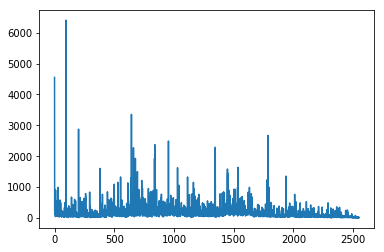

In [11]:
ted.comments.plot()

Matplotlib creates a **line** plot for us.
* `x` is the index
* `y` is the value of the `comments` field

Line plots are usually for plotting something over time. We do not have a time component here, so this isn't necessarily the most useful.

However, this can be useful for getting a rough understanding of the distribution of values.

**Access function documentation** 🔥

* Inside of a function, you can hit shift+tab to bring up the function signature / doc string!
* Regular "tab" will start autocompleting keyword arguments.


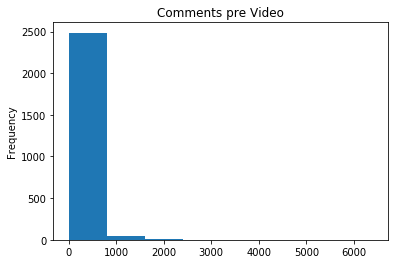

In [12]:
ted.comments.plot(kind='hist', title='Comments pre Video', bins=8)

A histogram shows the frequency distribution of a single numeric variable.
It shows how many occurrences happen in each bin.

This histogram is not that useful, because the histogram is artificially spread out by the outlier with over 6000 talks.

Most talks have less than 600 comments (first bin), and we do not see any breakdown inside of that.

We can filter down to only the talks with less than 1000 comments and see that distribution.

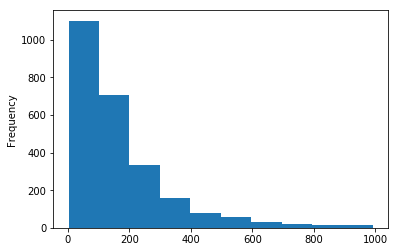

In [13]:
ted[ted.comments < 1000].comments.plot(kind='hist')

In [14]:
ted[ted.comments >= 1000].shape

(32, 19)

We only lost 32 talks when we filtered to talks with less than 1000 comments.

Note that `ted.query('comments < 1000')` is another acceptable way to filter.

The speaker believes that using `loc` is the most readable way to filter because it is the most explicit. You are telling Pandas exactly which rows and columns you want.

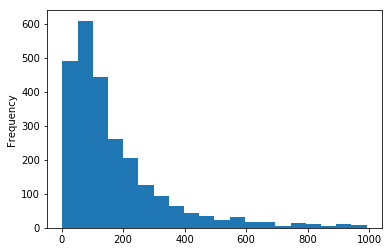

In [15]:
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist', bins=20)

# ted.loc[What rows do I want, What columns do I want]

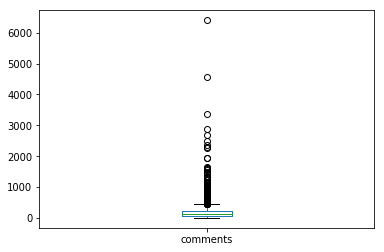

In [16]:
ted.comments.plot(kind='box')

All the black dots are "outliers." There are so many outliers that it is not terribly informative in this case.

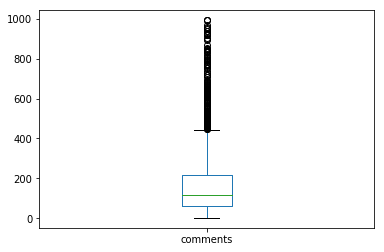

In [17]:
ted[ted.comments < 1000].comments.plot(kind='box')

Even with just the videos with less than 1000 comments, this distribution has so many in the right tail, that this is not super useful.

It is generally easier to use Pandas plotting functions than matplotlib. So during exploration, it is usually better to stick to Pandas.

Remember to modify the plot defaults to dig in and get a more informative plot.

Remember visualization is a summary, and about getting information about a data set quickly. The best visualization depends on the question. Do not be afraid to throw out some data to be able to more accurately visualize the remaining data.

# Plot the number of talks that took place each year

In [18]:
def to_year(timestamp):
    """Convert integer timestamp to a year"""
    dt = datetime.fromtimestamp(timestamp)
    return dt.year

ted['film_year'] = ted.film_date.apply(to_year)

# Check out pd.to_datetime for a very robust and easy conversion mechanism as well
ted['film_datetime'] = pd.to_datetime(ted.film_date, unit='s')

In [19]:
# Strings and datetimes and other data types have special little namespaces
# for convenience methods on Series
# For instance ted.film_datetime.dt.day_of_week, etc
ted.film_datetime.dt.year.head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: film_datetime, dtype: int64

In [20]:
# Sanity check that our conversion worked
# A lot of the event titles have the year in the name
ted[['event', 'film_year']].sample(10)

,event,film_year
109,TED2007,2007
322,TEDGlobal 2007,2007
2221,TED2016,2016
2385,TEDxStanford,2016
945,TEDxWarwick,2011
263,TED2004,2004
1602,TEDMED 2013,2013
392,TED2004,2004
1575,TEDGlobal 2013,2013
593,TEDIndia 2009,2009


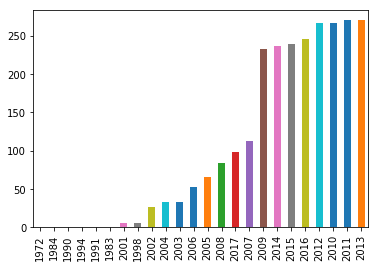

In [21]:
ted['film_year'].value_counts(ascending=True).plot(kind='bar')

A bar plot is okay, but it does include years that had no data.

**Bar plots are for categorical data.**

**Line plots are for things plotted over time.**

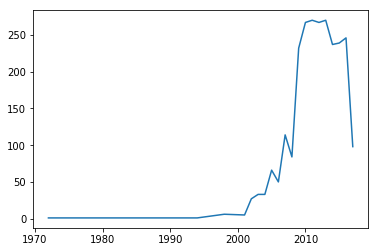

In [22]:
# We need to sort_index() here
# ascending=True on value_counts() does not work, because we are sorting on
# the counts (y values)
# Sorting index will sort on the left-hand side of the series - years
# Without sort index, matplotlib will connect the dots in the wrong order

ted.film_datetime.dt.year.value_counts().sort_index().plot() # kind='line' is default

In [23]:
# We do not have a sharp dropoff
# Instead, we have incomplete data

ted.film_datetime.max()

Timestamp('2017-08-27 00:00:00')

## Takeaways

1. Read the docs on the data set to figure out what columns will help you
1. Read pandas docs to see if there is a "batteries-included" way to do it.
1. Use the datetime data type because it works well with plots and provides convenience methods and other powerful tooling
1. Do sanity checks on your work as you go.
1. Consider excluding data if it might not be relevant (e.g., maybe we should exclude 2017 because it is incomplete, and some of these talks aren't technically TED talks).

# What were the "best" events in TED history to attend?

Not asking about the best talk, but the best overall event.

Define best, and then go at it.



In [24]:
# First, how many talks are there?
ted.event.value_counts().head()

TED2014    84
TED2009    83
TED2013    77
TED2016    77
TED2015    75
Name: event, dtype: int64

In [25]:
# But what about talk quality?
# The views might tell us something
ted.groupby('event').views.mean().sort_values().tail()

event
TEDxNorrkoping        6569493.0
TEDxCreativeCoast     8444981.0
TEDxBloomington       9484259.5
TEDxHouston          16140250.5
TEDxPuget Sound      34309432.0
Name: views, dtype: float64

TEDxPuget Sound had 34 million views per talk!
But were there enough talks for it to be an interesting event?

In [26]:
ted.groupby('event').views.agg(['count', 'mean']).sort_values('mean').tail()

,count,mean
event,,
TEDxNorrkoping,1,6569493.0
TEDxCreativeCoast,1,8444981.0
TEDxBloomington,2,9484259.5
TEDxHouston,2,16140250.5
TEDxPuget Sound,1,34309432.0


There was only 1 talk at TEDxPuget Sound! Probably not the "best" event in TED history.

In [27]:
ted.groupby('event').views.agg(['count', 'mean', 'sum']).sort_values('sum').tail()

,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937


TED2013 had the highest total number of online video views, so that makes it a candidate for "best."

## Takeaways

1. Think creatively. How can you use the data you _have_ to answer a question. Be honest about the weaknesses of the approach.
1. Watch out for small sample sizes. Use `count` with `mean` to detect meaningless means.


# Unpack the ratings data

In [33]:
# Let's check out what the first one looks like to see what we need to unpack
# Both of these syntaxes work just fine
ted.loc[0, 'ratings']
ted.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [34]:
# What is the type?
type(ted.ratings[0])

str

It is a stringified list of dictionaries. i.e., we are dealing with JSON.

In [38]:
# One way to get a list of dictionaries
eval(ted.ratings[0])

# Probably not wise to just evaluate aribtrary data as Python though

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [39]:
import ast

In [44]:
# A bit safer: Evaluate a string containing Python literals
ast.literal_eval(ted.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [51]:
ted['ratings_list'] = ted.ratings.apply(ast.literal_eval)

# We now have a column with lists in it
# So ted.ratings_list is a series of lists
# Personally, I would rather unpack the list and create a column for each rating type
# that contains the counts

In [50]:
ted.ratings_list.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings_list, dtype: object

By convention, the speaker uses `.apply` when applying a function to each element of an array, and uses `.map` when doing simple transformations e.g., 'a' -> 1, 'b' -> 2. He has a video that digs into the difference between apply, map, and apply map across both Series and DataFrames.

## Takeaways

1. `apply` is slower than built-in Pandas functions. But use it if you need to!
1. Pay attention to data types to know kind of functions you have available to you!

# Count the total number of ratings received by each talk

Store this in a new column named `num_ratings`.

In [72]:
def count_all_ratings(ratings_list):
    return sum(map(lambda d: d.get('count'), ratings_list))

ted['num_ratings'] = ted.ratings_list.apply(count_all_ratings)

In [75]:
ted.num_ratings.describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: num_ratings, dtype: float64

Just do a describe to do a spot check. These numbers look reasonable. No reason to think we messed up here.

## Takeaways

1. Write code in small chunks and do sanity checks as you go.
1. Lambda is best for simple functions.

# Which occupations deliver the funniest TED talks on average?

In [76]:
ted.ratings_list[1]

[{'id': 7, 'name': 'Funny', 'count': 544},
 {'id': 3, 'name': 'Courageous', 'count': 139},
 {'id': 2, 'name': 'Confusing', 'count': 62},
 {'id': 1, 'name': 'Beautiful', 'count': 58},
 {'id': 21, 'name': 'Unconvincing', 'count': 258},
 {'id': 11, 'name': 'Longwinded', 'count': 113},
 {'id': 8, 'name': 'Informative', 'count': 443},
 {'id': 10, 'name': 'Inspiring', 'count': 413},
 {'id': 22, 'name': 'Fascinating', 'count': 132},
 {'id': 9, 'name': 'Ingenious', 'count': 56},
 {'id': 24, 'name': 'Persuasive', 'count': 268},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 116},
 {'id': 26, 'name': 'Obnoxious', 'count': 131},
 {'id': 25, 'name': 'OK', 'count': 203}]

In [116]:
# Does every rating list always have a Funny dictionary?
# Let's count up all the ones that have funny and see if it matches 
# the total number of rows
ted.ratings.str.contains('Funny').value_counts() == ted.ratings.size

True    True
Name: ratings, dtype: bool

In [104]:
list(map(lambda d: d['count'], filter(lambda d: d['name'] == 'Funny', ted.ratings_list[0])))[0]

def funny_ratings_count(ratings_list):
    return list(map(
      lambda d: d.get('count'),
      filter(
        lambda d: d.get('name') == 'Funny',
        ratings_list
      )
    ))[0]

ted['funny_rating_count'] = ted.ratings_list.apply(funny_ratings_count)

In [118]:
ted['funny_rate'] = ted.funny_rating_count / ted.num_ratings

In [119]:
ted.funny_rate.describe()

count    2550.000000
mean        0.050361
std         0.087779
min         0.000000
25%         0.005922
50%         0.014981
75%         0.047736
max         0.702076
Name: funny_rate, dtype: float64

In [124]:
# Intuitively, the 20 funniest talks should be given
# by people with "funny" occupations
ted.sort_values('funny_rate').speaker_occupation.tail(20)

1849                       Science humorist
337                                Comedian
124     Performance poet, multimedia artist
315                                  Expert
1168             Social energy entrepreneur
1468                          Ornithologist
595                  Comedian, voice artist
1534                         Cartoon editor
97                                 Satirist
2297                          Actor, writer
568                                Comedian
675                          Data scientist
21                     Humorist, web artist
194                                Jugglers
2273                    Comedian and writer
2114                    Comedian and writer
173                                Investor
747                                Comedian
1398                               Comedian
685             Actor, comedian, playwright
Name: speaker_occupation, dtype: object

In [126]:
ted.groupby('speaker_occupation').funny_rate.mean().sort_values().tail()

speaker_occupation
Comedian                       0.512457
Actor, writer                  0.515152
Actor, comedian, playwright    0.558107
Jugglers                       0.566828
Comedian and writer            0.602085
Name: funny_rate, dtype: float64

In [127]:
# Let's investigate the sample size
ted.groupby('speaker_occupation').funny_rate.agg(['mean', 'count']).sort_values('mean').tail()

,mean,count
speaker_occupation,,
Comedian,0.512457,6
"Actor, writer",0.515152,1
"Actor, comedian, playwright",0.558107,2
Jugglers,0.566828,1
Comedian and writer,0.602085,2


In [128]:
# Crap, the occupations are super unique!
ted.speaker_occupation.describe()

count       2544
unique      1458
top       Writer
freq          45
Name: speaker_occupation, dtype: object

Let's focus on occupations that are well-represented in the data.

In [131]:
# Let's identify the occupations that are somewhat frequent
ted.speaker_occupation.value_counts()

Writer                                        45
Artist                                        34
Designer                                      34
Journalist                                    33
Entrepreneur                                  31
Architect                                     30
Inventor                                      27
Psychologist                                  26
Photographer                                  25
Filmmaker                                     21
Educator                                      20
Neuroscientist                                20
Economist                                     20
Author                                        20
Philosopher                                   16
Roboticist                                    16
Biologist                                     15
Physicist                                     14
Musician                                      11
Marine biologist                              11
Activist            

Note that `value_counts()` returns a Series, which is useful to us.

In [132]:
occupation_counts = ted.speaker_occupation.value_counts()

In [135]:
# We can filter this just like any other series
frequent_occupations = occupation_counts[occupation_counts >= 5].index

In [136]:
type(frequent_occupations)

pandas.core.indexes.base.Index

^ We can treat an index like a list

In [145]:
ted[ted.speaker_occupation.isin(frequent_occupations)].groupby('speaker_occupation').funny_rate.agg(['mean', 'count']).sort_values('mean').tail()

,mean,count
speaker_occupation,,
Data scientist,0.184076,5
Producer,0.202531,5
Singer/songwriter,0.252205,9
"Performance poet, multimedia artist",0.306468,6
Comedian,0.512457,6


There are still some weaknesses.

We are not checking for unique speakers. If one funny speaker gives 8 talks, they will count as 8 toward their occupation.